Porówanie modeli

In [4]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Ładowanie danych
pima = pd.read_csv('Data/diabetes.csv', sep=';')
df = pd.read_csv('Data/diabetes_pt1.csv', sep=';')
df_test = pd.read_csv('Data/diabetes_pt2.csv', sep=';')

In [6]:
# Definiowanie kolumn z danymi
feature_columns1 = ['Glucose', 'BMI', 'Age']
feature_columns2 = ['Glucose', 'Age', 'BMI', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction']

# Przygotowanie danych dla modelu Stan
stan1_data = {
    'N': len(df),
    'X': df[feature_columns1].values,
    'y': df['Outcome'].values
}

stan2_data = {
    'N': len(df),
    'X': df[feature_columns2].values,
    'y': df['Outcome'].values
}

# Kompilacja i próbkowanie modelu
sm1 = CmdStanModel(stan_file='Stan/code_1.stan')
fit1 = sm1.sample(data=stan1_data, iter_sampling=2000, chains=4, iter_warmup=1000)

sm2 = CmdStanModel(stan_file='Stan/code_2.stan')
fit2 = sm2.sample(data=stan2_data, iter_sampling=2000, chains=4, iter_warmup=1000)

# Konwersja wyników CmdStan do formatu ArviZ
idata1 = az.from_cmdstanpy(posterior=fit1, log_likelihood="log_lik")
idata2 = az.from_cmdstanpy(posterior=fit2, log_likelihood="log_lik")

# Obliczanie WAIC i LOO
waic1 = az.waic(idata1)
waic2 = az.waic(idata2)
loo1 = az.loo(idata1)
loo2 = az.loo(idata2)

# Wypisanie wyników
print("Model 1 WAIC:", waic1)
print("Model 2 WAIC:", waic2)
print("Model 1 PSIS-LOO:", loo1)
print("Model 2 PSIS-LOO:", loo2)

# Porównanie modeli za pomocą ArviZ
comparison = az.compare({'model1': idata1, 'model2': idata2}, ic="waic")
print(comparison)

INFO:cmdstanpy:compiling stan file /DA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/code_1.stan to exe file /DA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/code_1
INFO:cmdstanpy:compiled model executable: /DA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/code_1
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:compiling stan file /DA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/code_2.stan to exe file /DA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/code_2
INFO:cmdstanpy:compiled model executable: /DA/Data-Analytics/Project/PimaDiabetesPrediction/LogisticRegresion/Stan/code_2
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


/tmp/ipykernel_28757/4065327861.py:30: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  waic1 = az.waic(idata1)
/tmp/ipykernel_28757/4065327861.py:31: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  waic2 = az.waic(idata2)
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/tmp/ipykernel_28757/4065327861.py:32: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  loo1 = az.loo(idata1)
/tmp/ipykernel_28757/4065327861.py:33: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please

Model 1 WAIC: Computed from 8000 by 293 log-likelihood matrix

          Estimate       SE
elpd_waic  -145.13     7.00
p_waic        3.29        -
Model 2 WAIC: Computed from 8000 by 293 log-likelihood matrix

          Estimate       SE
elpd_waic  -146.58     7.70
p_waic        6.12        -

There has been a warning during the calculation. Please check the results.
Model 1 PSIS-LOO: Computed from 8000 by 293 log-likelihood matrix

         Estimate       SE
elpd_loo  -145.13     7.00
p_loo        3.29        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      293  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

Model 2 PSIS-LOO: Computed from 8000 by 293 log-likelihood matrix

         Estimate       SE
elpd_loo  -146.60     7.70
p_loo        6.15        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      293  10

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


                    rank        waic    p_waic    d_waic    weight        se  \
Model 1 (3 priori)     0 -145.130342  3.287403  0.000000  0.749551  6.998805   
Model 2 (6 priori)     1 -146.576064  6.122148  1.445721  0.250449  7.698854   

                         dse  warning waic_scale  
Model 1 (3 priori)  0.000000    False        log  
Model 2 (6 priori)  2.415625     True        log  


/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


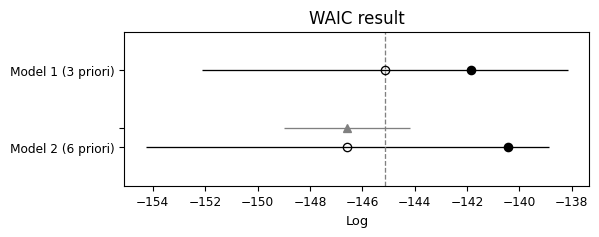

In [10]:
compare_dict = {'Model 1 (3 priori)': fit1, 'Model 2 (6 priori)': fit2}

waic_compare = az.compare(compare_dict, ic='waic')
print(waic_compare)
az.plot_compare(waic_compare)
plt.title('WAIC result')
plt.show()

                    rank         loo     p_loo     d_loo    weight        se  \
Model 1 (3 priori)     0 -145.133209  3.290269  0.000000  0.752976  6.999044   
Model 2 (6 priori)     1 -146.600196  6.146281  1.466987  0.247024  7.701955   

                        dse  warning loo_scale  
Model 1 (3 priori)  0.00000    False       log  
Model 2 (6 priori)  2.41895    False       log  


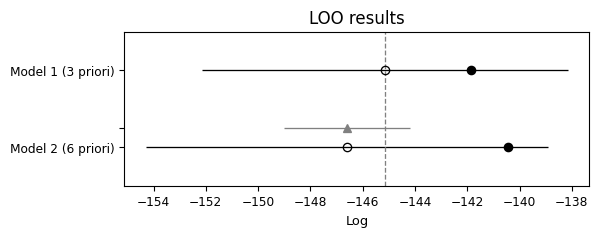

In [11]:
loo_compare = az.compare(compare_dict, ic='loo')
print(loo_compare)
az.plot_compare(loo_compare)
plt.title('LOO results')
plt.show()